# Investigating how the prior function changes

In [2]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/")
from graphs.toy_graph import ToyGraph
from graphs.graph_6_nodes import Graph6Nodes
from graphs.graph_5_nodes import Graph5Nodes
from graphs.graph_erdos_renyi import ErdosRenyiGraph
from graphs.data_setup import setup_observational_interventional

from algorithms.PARENT_2_algorithm import PARENT
from algorithms.CBO_algorithm import CBO

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


cuda is available True
cuda is available True


# Checking the surrogate models

MEC SIZE: 12
GT causal graph
[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 1 0 0]]
Expected degree: 0.9


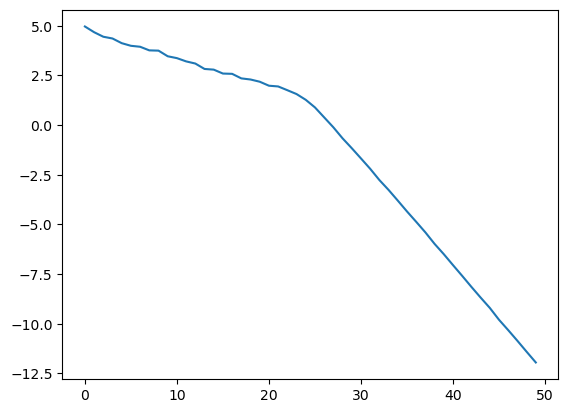

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from utils.sem_sampling import sample_model
graph = ErdosRenyiGraph(num_nodes=10, nonlinear=True)
graph.set_target('1')
es = ('2',)

intervention_vals = np.linspace(
    start=-4, stop=4, num=50
)

interventions = {}
true_vals = np.zeros(shape=50)
for i, intervention_val in enumerate(intervention_vals):
    interventions[es[0]] = intervention_val
    true_vals[i] = np.mean(
        sample_model(
            graph.SEM,
            interventions=interventions,
            sample_count=500,
            graph=graph,
        )[graph.target]
    )
    value = np.array([interventions[var] for var in es]).reshape(1, -1)


plt.plot(true_vals)


# ToyGraph

INFO:root:Sampling the observational data
INFO:root:Sampling the interventional data
INFO:root:Using predefined values for the optimization algorithm
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Using the fixed equal cost str

KeyboardInterrupt: 

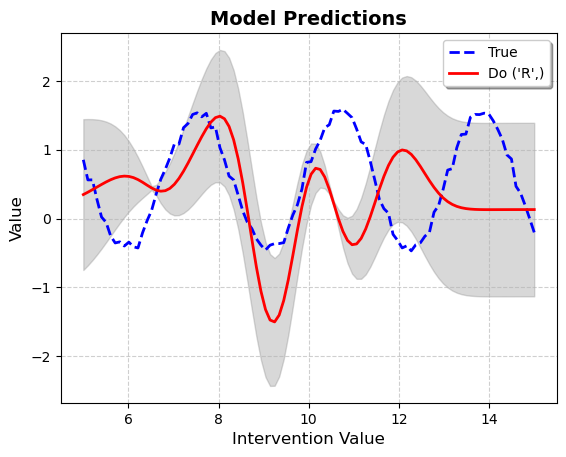

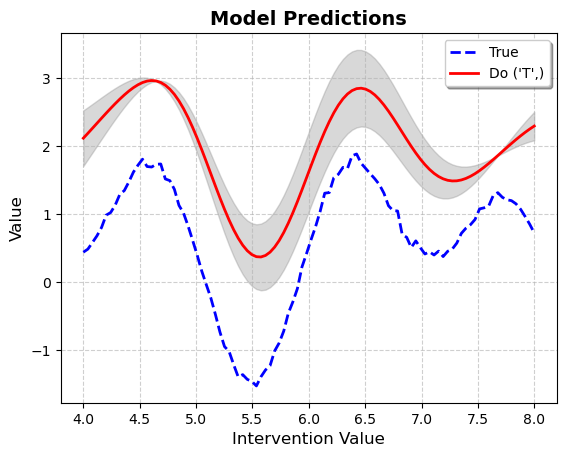

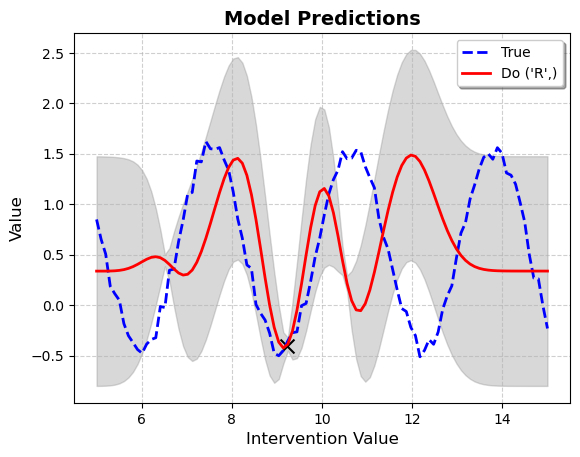

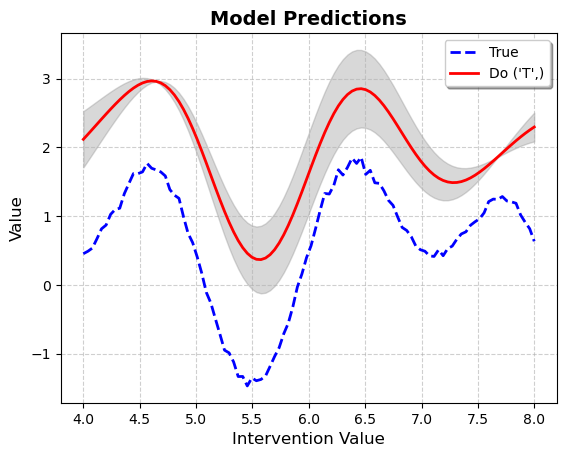

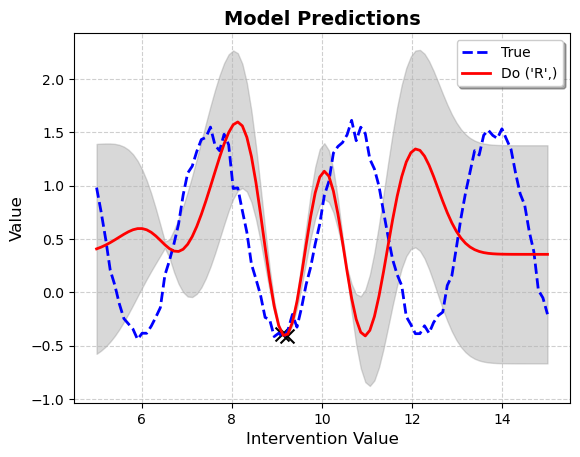

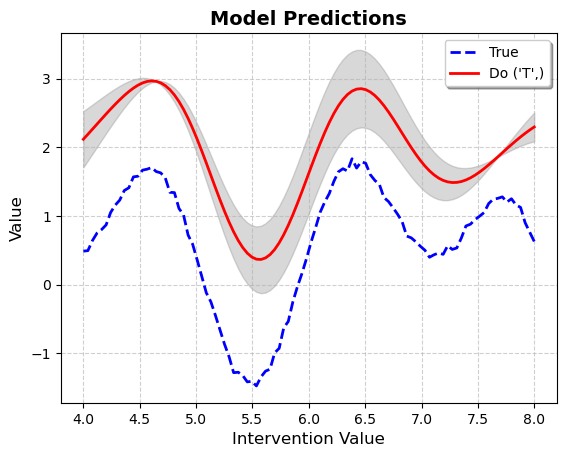

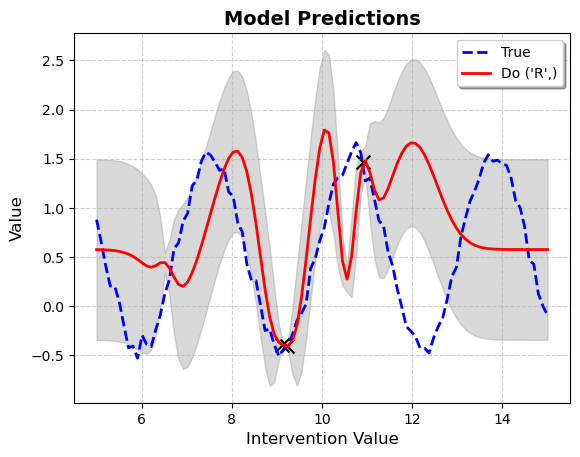

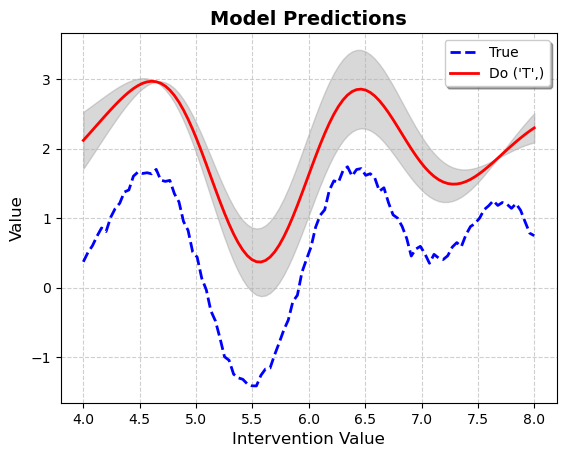

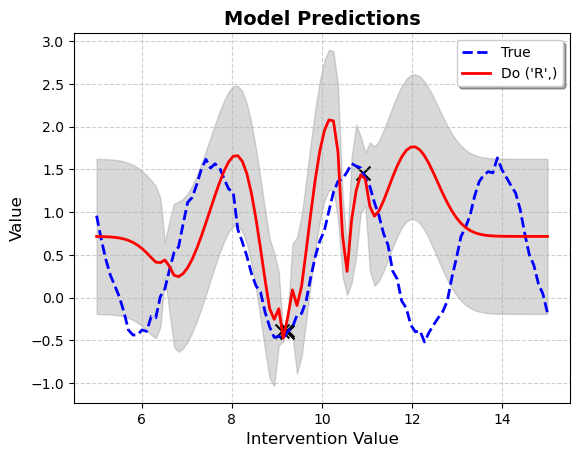

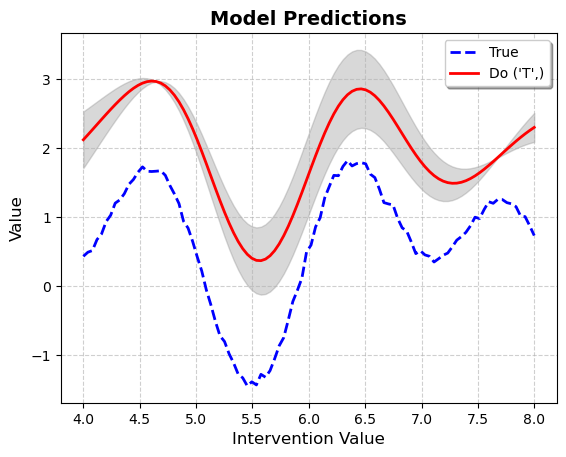

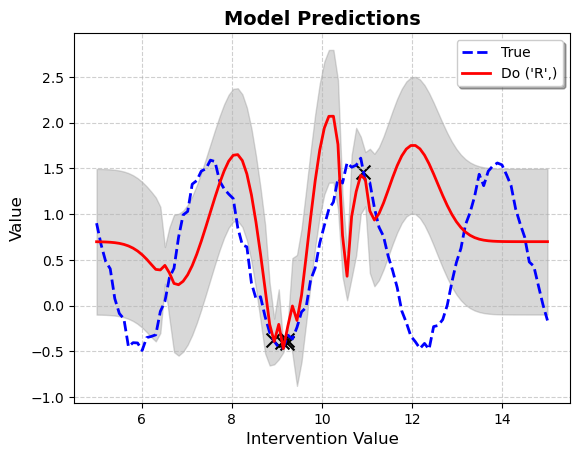

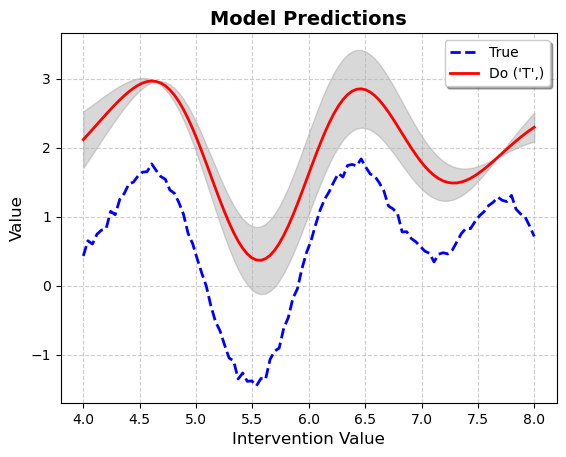

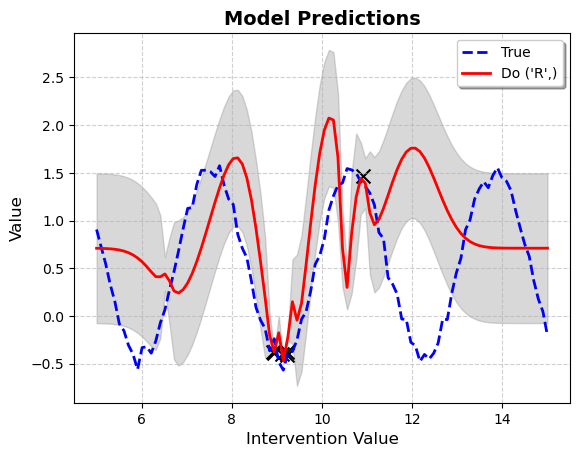

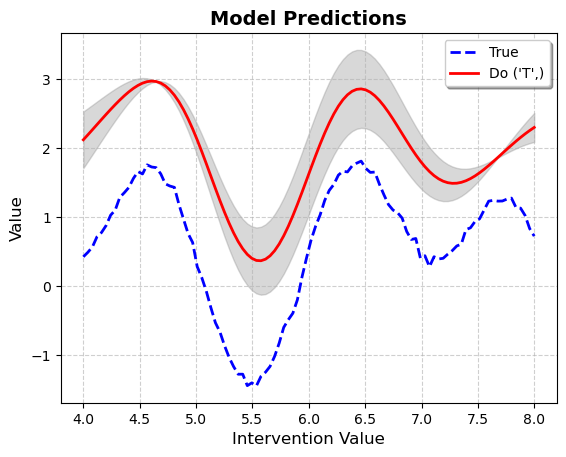

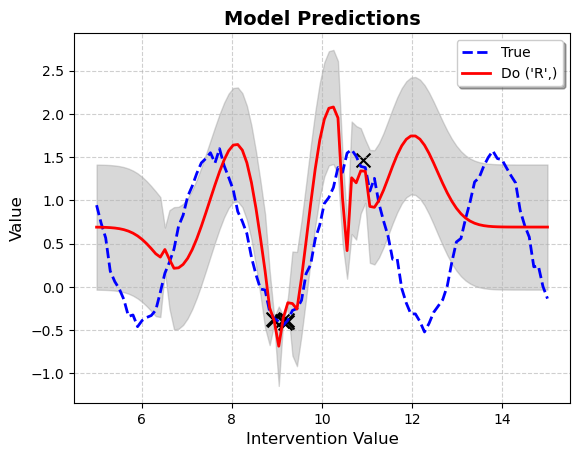

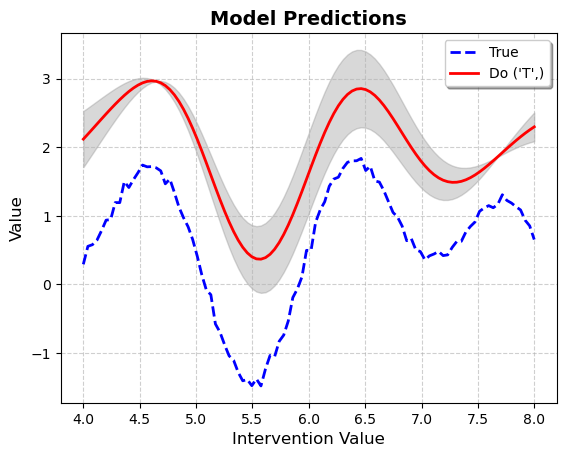

In [3]:
graph = Graph5Nodes()
edges = [
            ("B", "L"),
            ("B", "Y"),
            ("T", "L"),
            ("T", "R"),
            ("R", "Y"),
        ]
graph.mispecify_graph(edges)
n_obs = 200
n_int = 2
# using this as the interventional and observational data
D_O, D_I, exploration_set = setup_observational_interventional(
    graph_type=None,
    noiseless=True,
    seed=12,
    n_obs=n_obs,
    n_int=n_int,
    graph=graph
)
exploration_set = [("R",), ("T",)]
cbo_model = CBO(graph=graph)
cbo_model.set_values(D_O, D_I, exploration_set)
cbo_model.run_algorithm(T=25, file="model_checkpoints/")

# Healthcare Graph

INFO:root:Sampling the observational data
INFO:root:Sampling the interventional data
INFO:root:Using predefined values for the optimization algorithm
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:SAFE OPTIMZATION: Resetting kernel lenghtscale
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMZATION: Resetting kernel lenghtscale
INFO:root:Using the fixed equal cost structure
INFO:root:------ Iteration 0: Observed 1, where epsilon =  ------
INFO:root:------ Iteration 1: Intervened 1 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: resetting likelihood var to lower bound


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:The total uncertainty is {('a',): 0.6198898088629151, ('S',): -0.195542191113996, 'average': 0.21217380887445955}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('a',) at [[0.15416285]] with y = [[13.58865336]]
INFO:root:Current global optimum 13.588653355345167
INFO:root:------ Iteration 2: Intervened 2 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.8927560499768592, ('S',): -0.195542191113996, 'average': 0.34860692943143157}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[0.02082605]] with y = [[13.91012117]]
INFO:root:Current global optimum 13.670405758428817
INFO:root:------ Iteration 3: Intervened 3 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.8927560499768592, ('S',): 0.7070978556857433, 'average': 0.7999269528313013}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('a',) at [[0.]] with y = [[13.52162778]]
INFO:root:Current global optimum 13.588653355345167
INFO:root:------ Iteration 4: Intervened 4 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.737728210995558, ('S',): 0.7070978556857433, 'average': 0.7224130333406507}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('a',) at [[0.]] with y = [[13.52336117]]
INFO:root:Current global optimum 13.588653355345167
INFO:root:------ Iteration 5: Intervened 5 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.6030850984373521, ('S',): 0.7070978556857433, 'average': 0.6550914770615477}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('a',) at [[1.]] with y = [[14.10150431]]
INFO:root:Current global optimum 13.521627779921792
INFO:root:------ Iteration 6: Intervened 6 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): 0.7070978556857433, 'average': 0.7217294801700307}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.20500772]]
INFO:root:Current global optimum 13.521627779921792
INFO:root:------ Iteration 7: Intervened 7 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
overflow encountered in square
INFO:root:SAFE OPTIMIZATION: Resetting the kernel variance to lower bound
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): 0.5349705078543512, 'average': 0.6356658062543346}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.25716522]]
INFO:root:Current global optimum 13.521627779921792
INFO:root:------ Iteration 8: Intervened 8 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): 0.3856430492783939, 'average': 0.561002076966356}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[0.99339685]] with y = [[13.20823484]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 9: Intervened 9 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: Resetting the kernel variance to lower bound
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): 0.27850017317683906, 'average': 0.5074306389155785}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[0.99135988]] with y = [[13.21636929]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 10: Intervened 10 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): 0.19016305810672565, 'average': 0.46326208138052183}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.24582581]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 11: Intervened 11 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: Resetting the kernel variance to lower bound
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): 0.11048429351980296, 'average': 0.4234226990870605}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[0.99782909]] with y = [[13.26534839]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 12: Intervened 12 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): 0.039228689041645046, 'average': 0.3877948968479815}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.24821649]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 13: Intervened 13 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: Resetting the kernel variance to lower bound
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.02098654358239631, 'average': 0.3576872805359609}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[0.99303724]] with y = [[13.24927099]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 14: Intervened 14 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: Resetting the kernel variance to lower bound
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.07729507513351545, 'average': 0.3295330147604013}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[0.99965234]] with y = [[13.22821307]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 15: Intervened 15 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:SAFE OPTIMIZATION: Resetting the kernel variance to lower bound
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.1259889177520336, 'average': 0.3051860934511422}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[0.96734147]] with y = [[13.25350842]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 16: Intervened 16 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.19427225302601756, 'average': 0.2710444258141502}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.21065968]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 17: Intervened 17 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.22617618705816053, 'average': 0.25509245879807874}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.23674637]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 18: Intervened 18 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.273541090838034, 'average': 0.231410006908142}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.2210563]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 19: Intervened 19 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.3329481157687468, 'average': 0.20170649444278563}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.21135117]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 20: Intervened 20 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.3362539011613559, 'average': 0.20005360174648107}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.24929196]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 21: Intervened 21 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.39447750575938473, 'average': 0.17094179944746665}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.32675765]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 22: Intervened 22 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.41059606559319883, 'average': 0.1628825195305596}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.22368313]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 23: Intervened 23 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.4338678584312147, 'average': 0.15124662311155165}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.24722079]]
INFO:root:Current global optimum 13.20500772278482
INFO:root:------ Iteration 24: Intervened 24 where epsilon =  ------
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:The total uncertainty is {('a',): 0.736361104654318, ('S',): -0.4661805202096373, 'average': 0.13509029222234037}


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])
OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>


OrderedDict([('a', [0.0, 1.0]), ('S', [0.0, 1.0])])


INFO:root:Starting gradient-based optimization of acquisition function <class 'emukit.core.acquisition.acquisition.Quotient'>
INFO:root:Selected intervention ('S',) at [[1.]] with y = [[13.2441756]]
INFO:root:Current global optimum 13.20500772278482


([13.670405758428817,
  13.670405758428817,
  13.588653355345167,
  13.588653355345167,
  13.521627779921792,
  13.521627779921792,
  13.521627779921792,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482,
  13.20500772278482],
 [13.588653355345167,
  13.910121169945688,
  13.521627779921792,
  13.523361170706753,
  14.10150431464563,
  13.20500772278482,
  13.257165217663609,
  13.208234843407576,
  13.21636929171011,
  13.24582581274387,
  13.26534838635546,
  13.248216492205245,
  13.249270990137722,
  13.228213066830337,
  13.253508417613677,
  13.210659681209851,
  13.236746373266142,
  13.221056299769787,
  13.211351167521421,
  13.249291963021035,
  13.326757

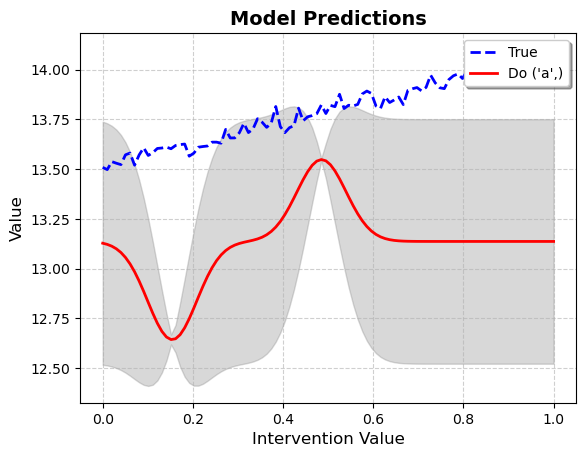

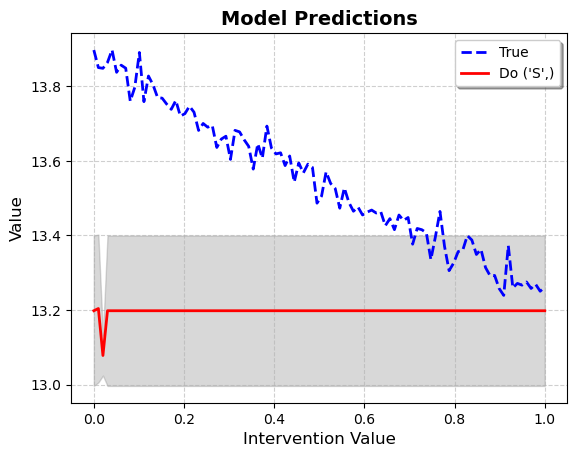

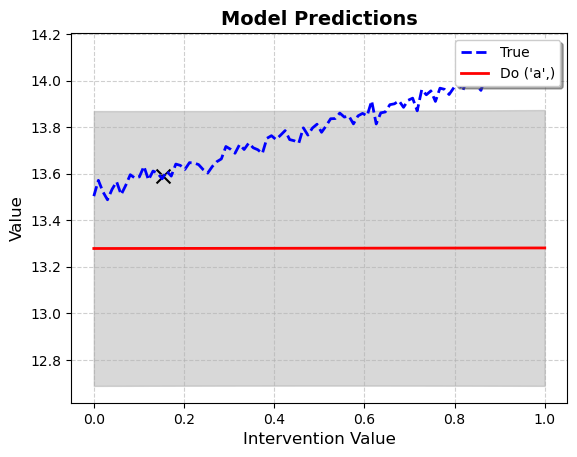

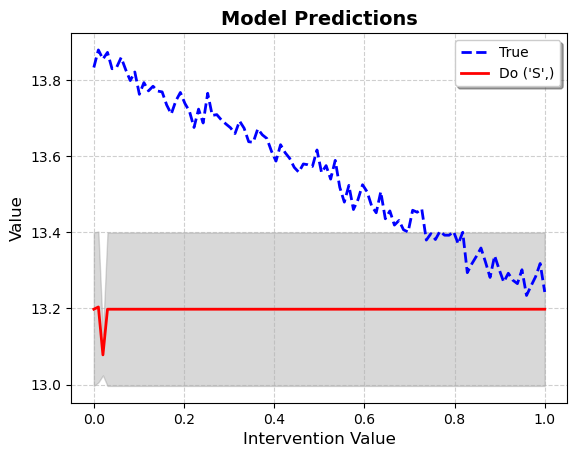

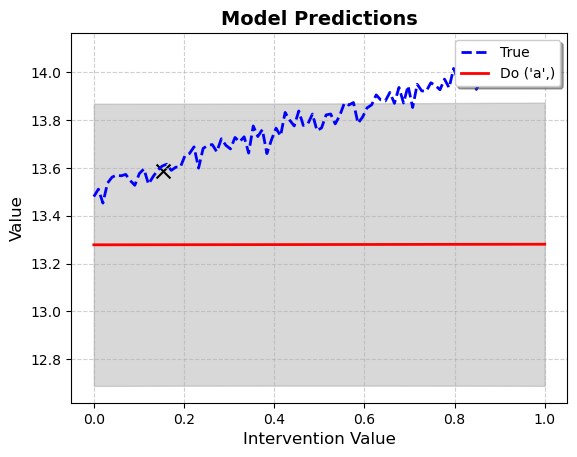

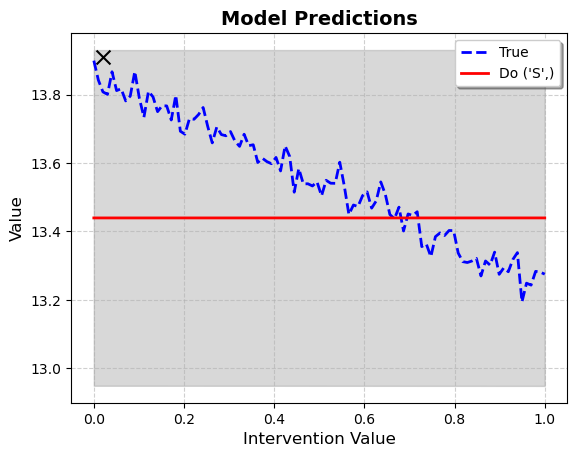

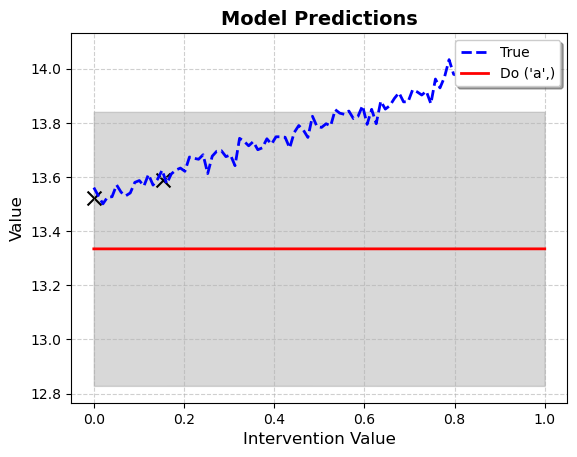

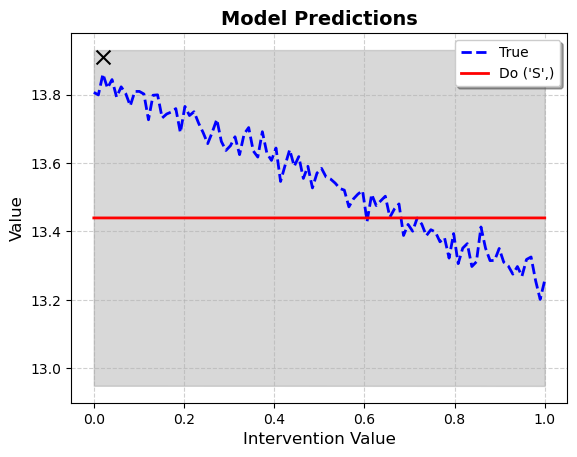

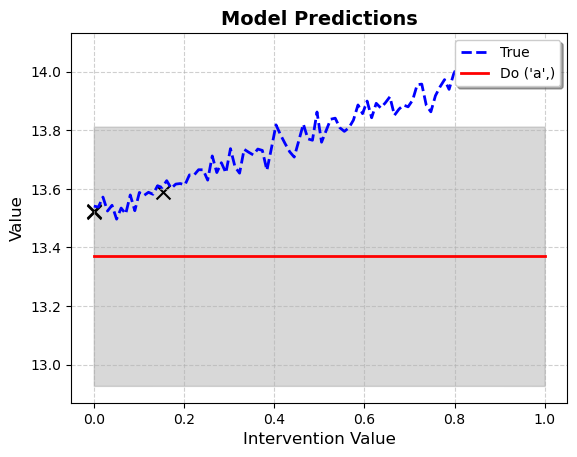

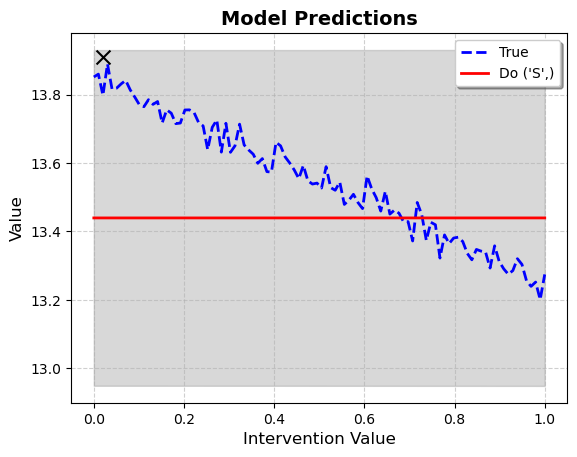

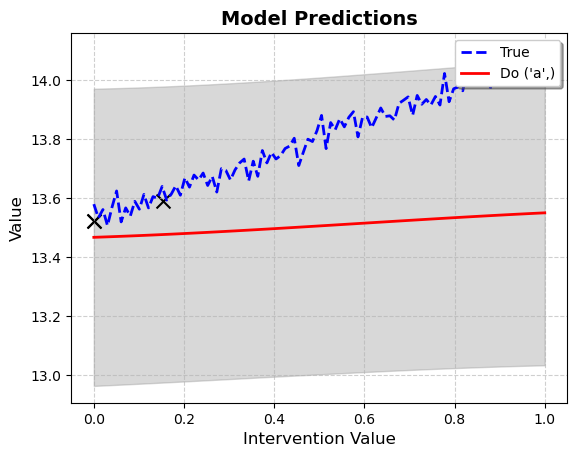

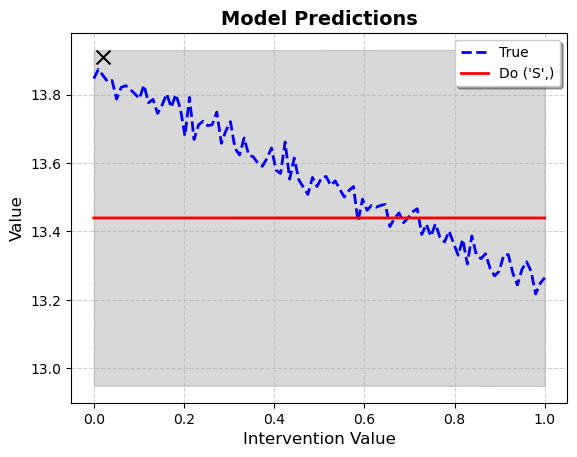

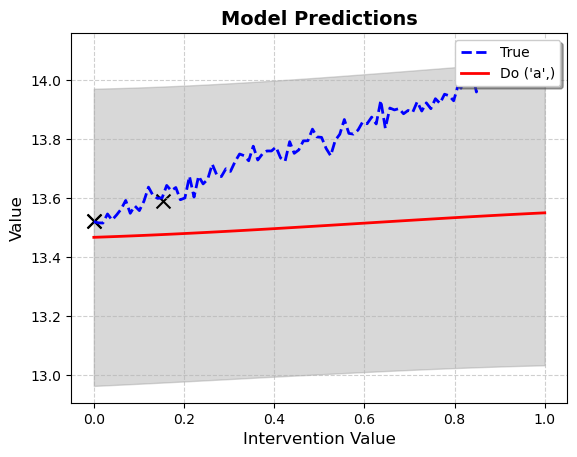

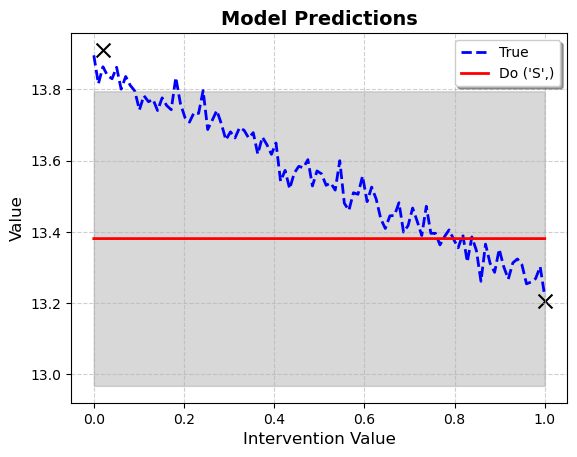

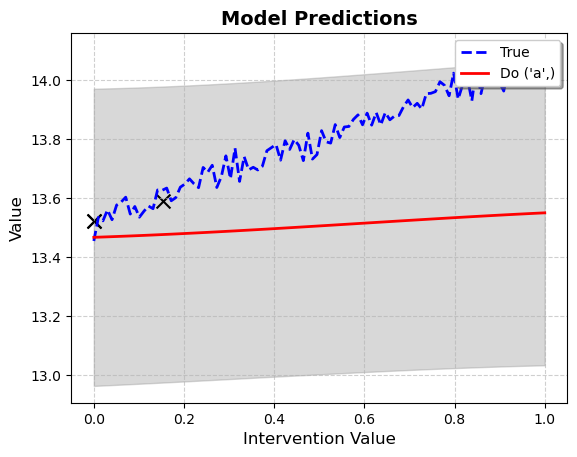

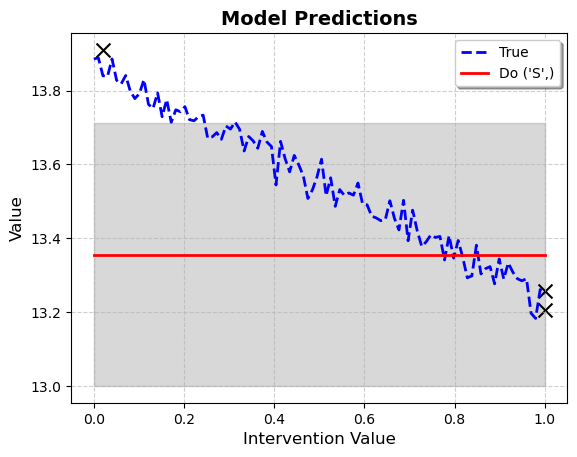

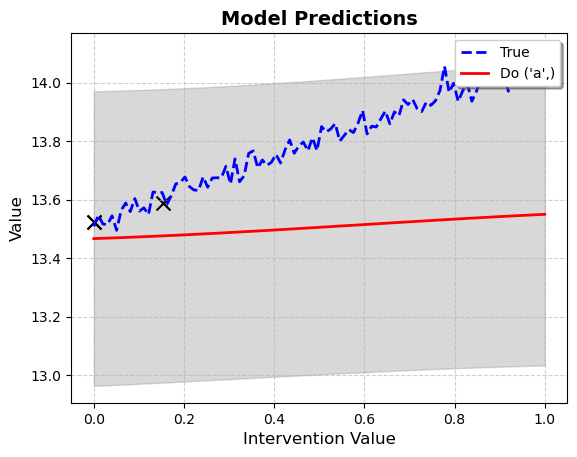

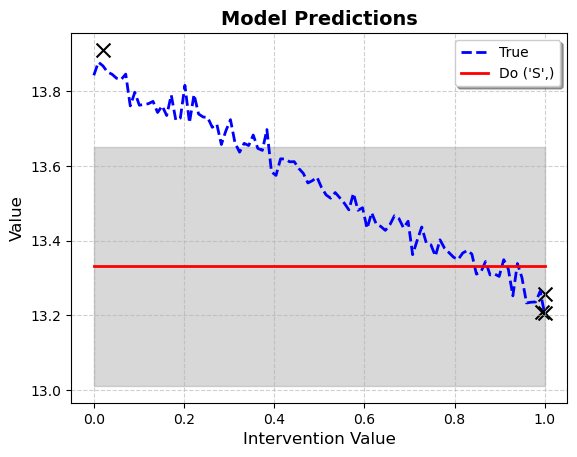

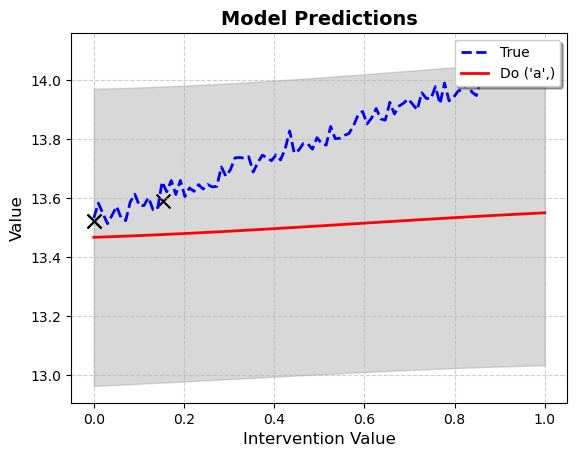

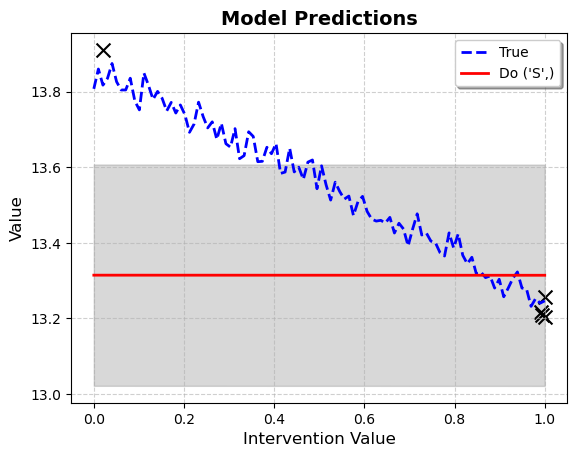

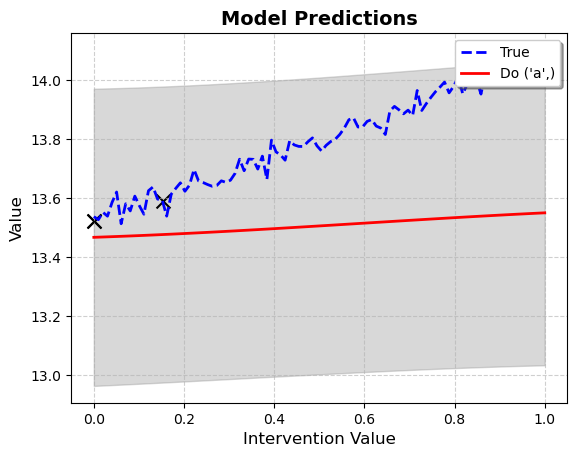

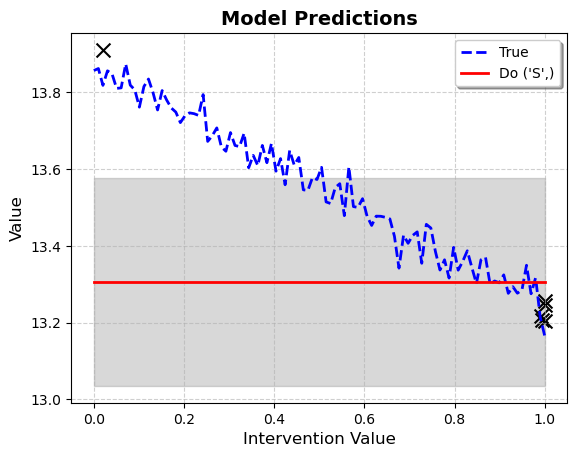

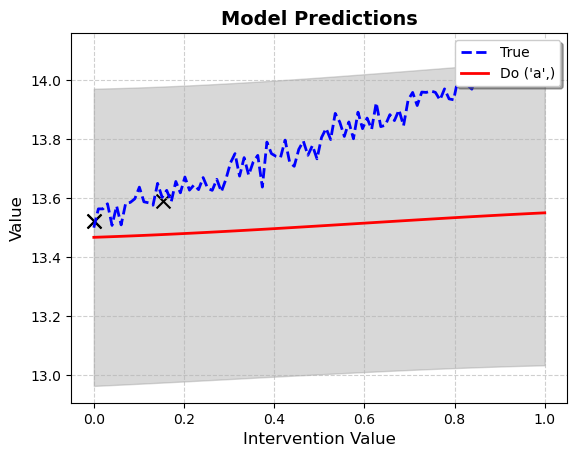

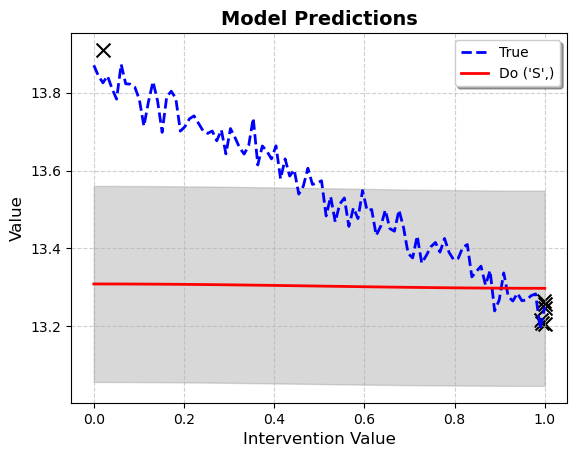

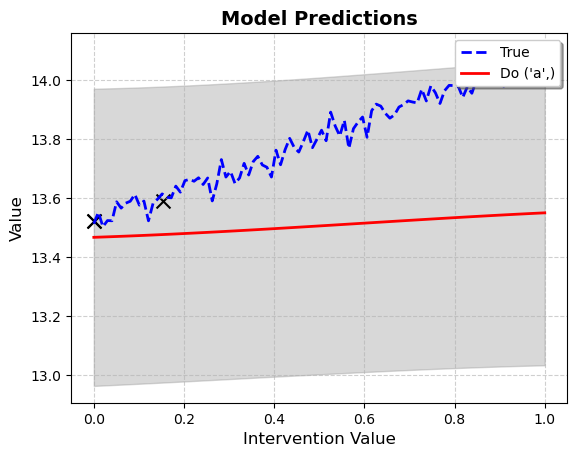

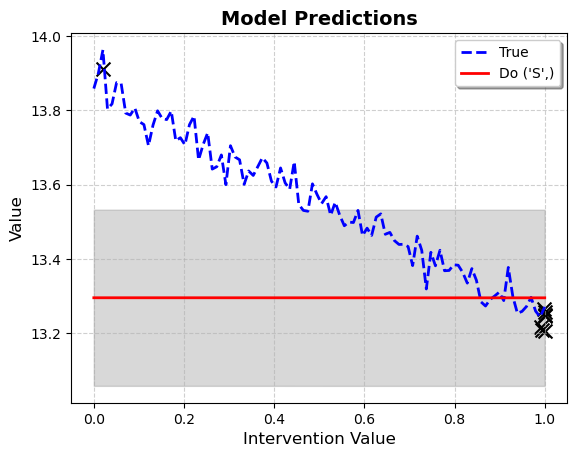

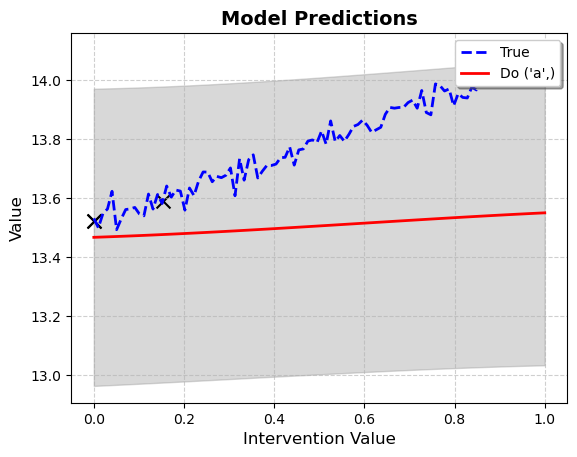

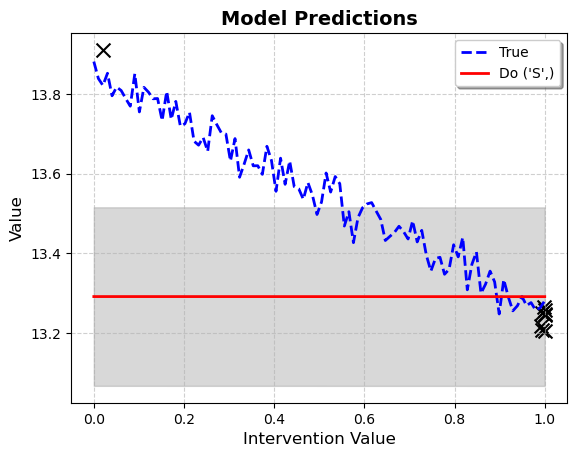

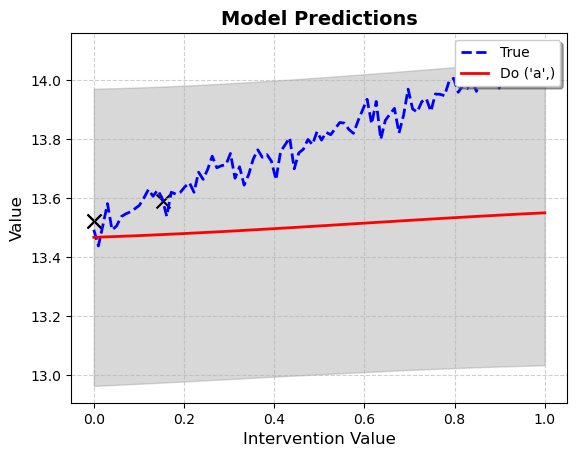

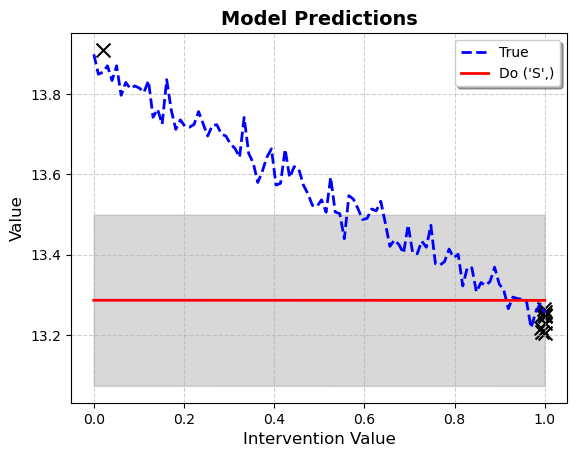

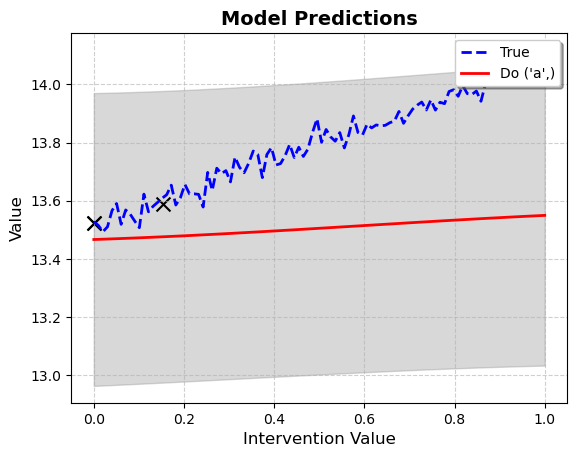

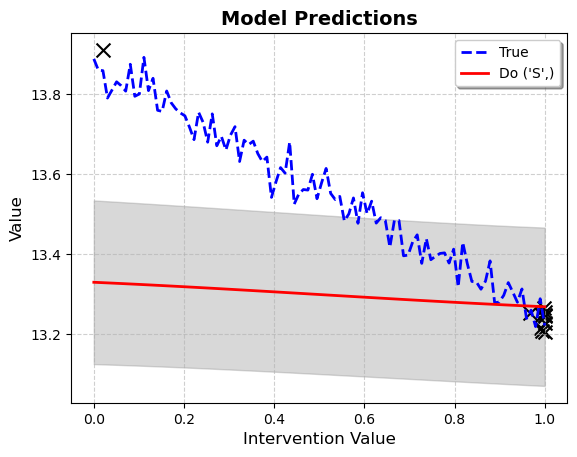

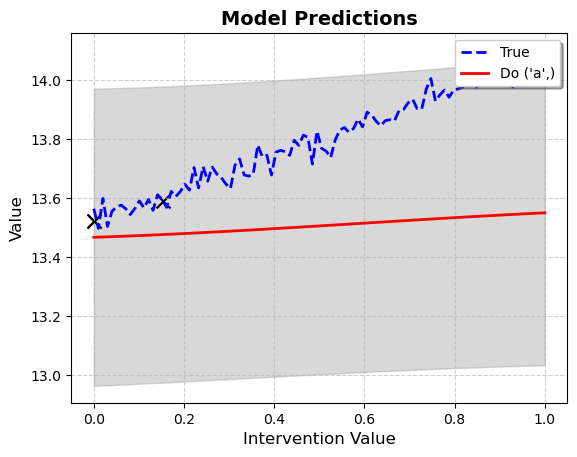

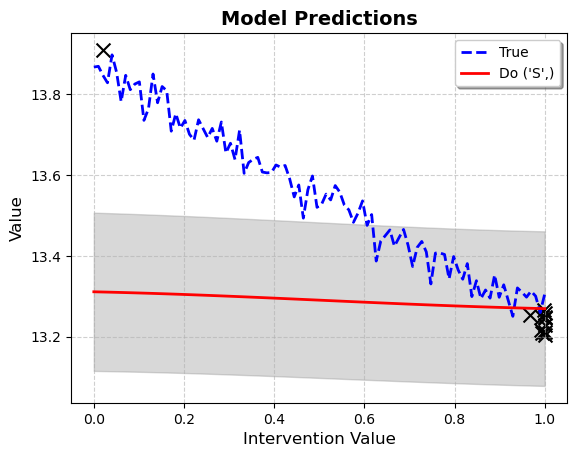

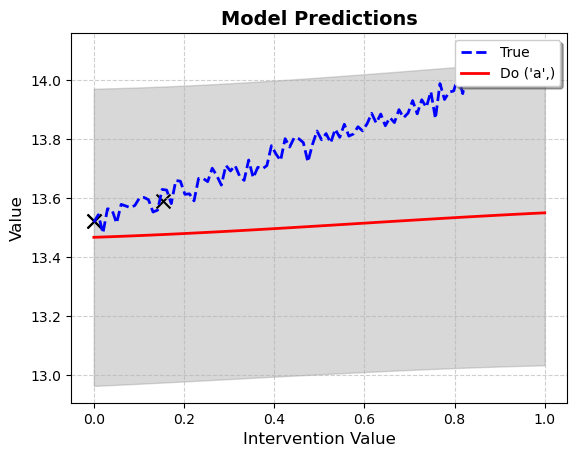

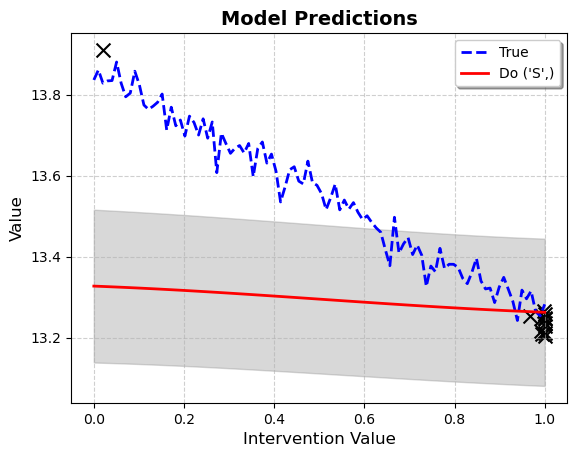

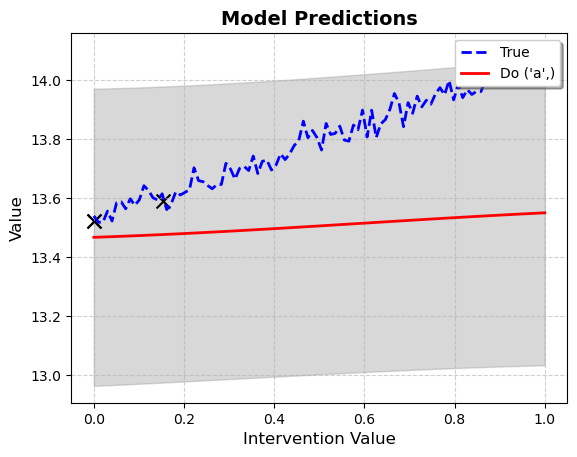

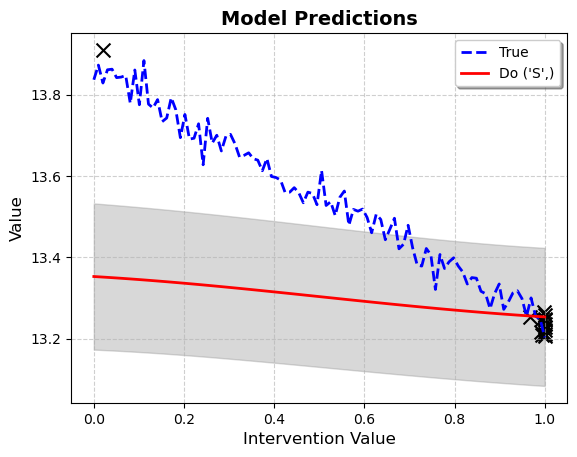

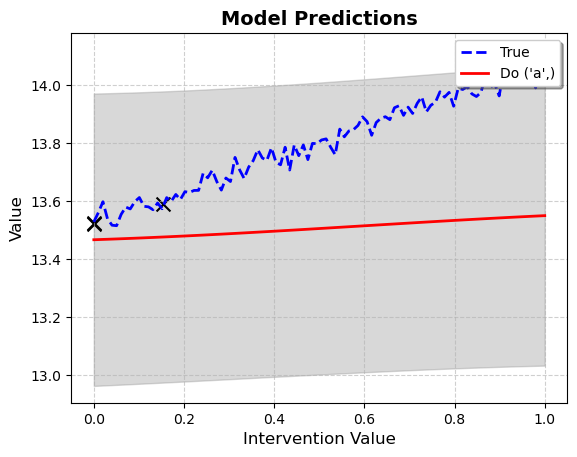

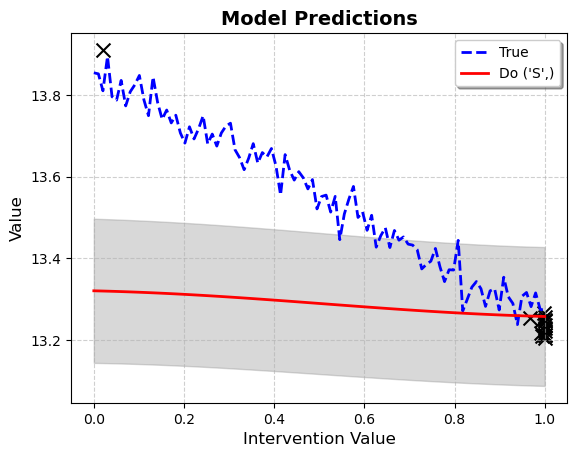

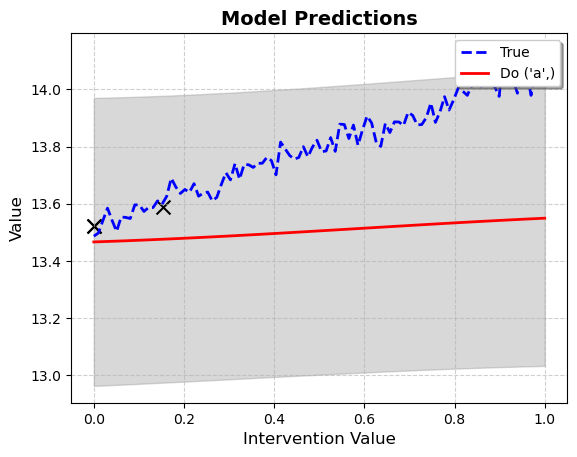

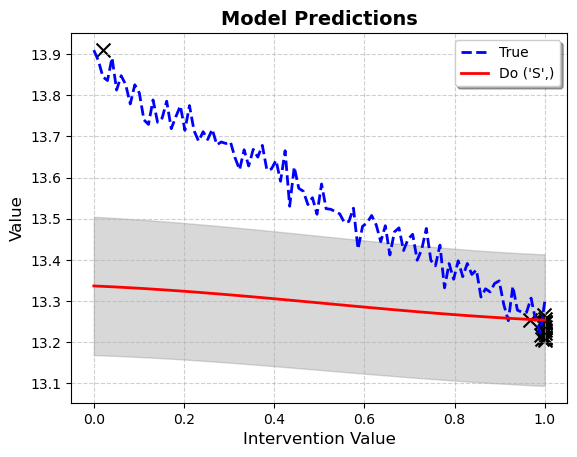

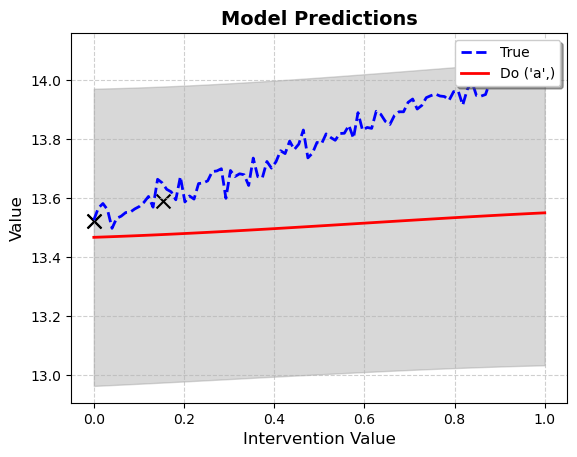

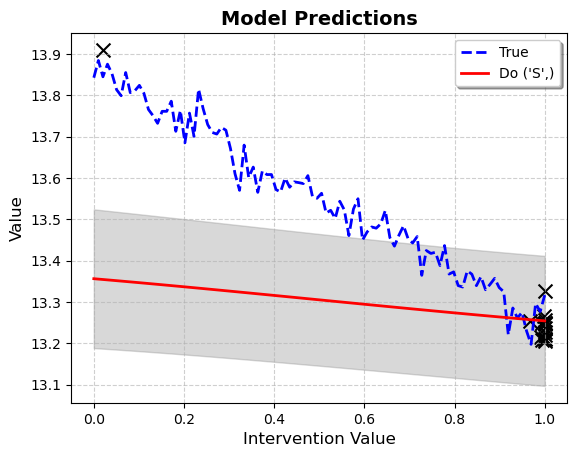

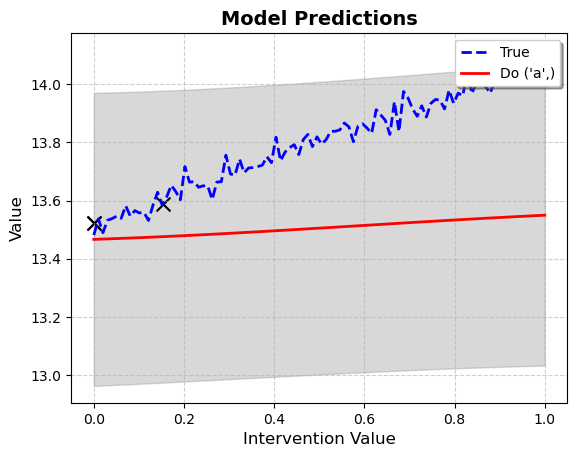

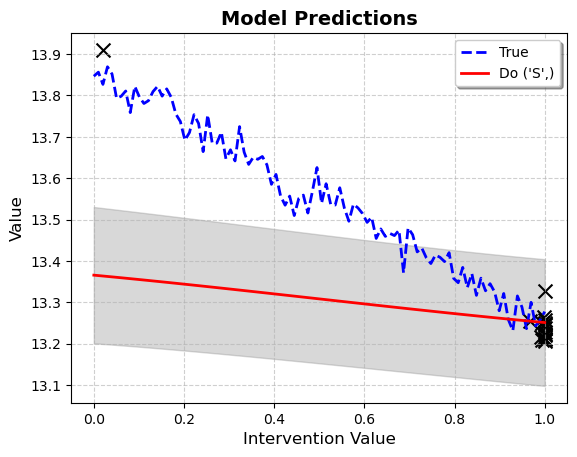

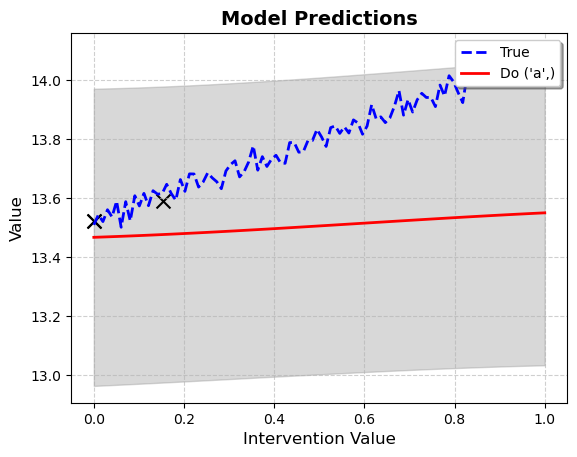

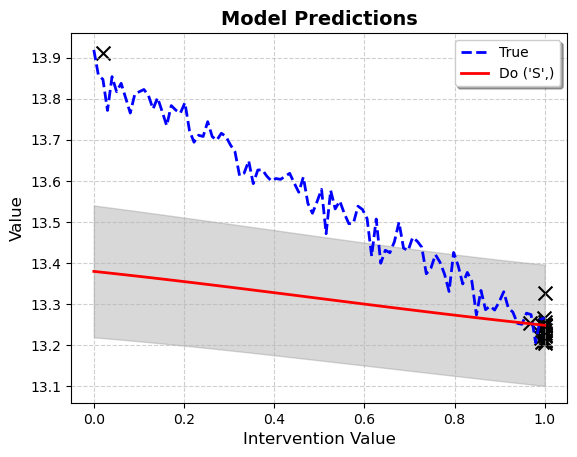

In [6]:
graph = Graph6Nodes()
edges = [
            ("A", "Y"),
            ("B", "Y"),
            # ("As", "Y"),
            # ("S", "Y"),
            ("C", "Y"),
        ]
graph.mispecify_graph(edges)
n_obs = 200
n_int = 2
# using this as the interventional and observational data
D_O, D_I, exploration_set = setup_observational_interventional(
    graph_type=None,
    noiseless=True,
    seed=12,
    n_obs=n_obs,
    n_int=n_int,
    graph=graph
)
exploration_set = [("a",), ("S",)]
cbo_model = CBO(graph=graph)
cbo_model.set_values(D_O, D_I, exploration_set)
cbo_model.run_algorithm(T=25, file="model_checkpoints/")